In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import numpy as np
import pandas as pd
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
bs1_losses = [0.00516, 0.00090, 0.00076, 0.00067, 0.00055, 0.00051, 0.00048, 0.00046, 0.00045, 0.00044]
bs2_losses = [0.00851, 0.00151, 0.00092, 0.00081, 0.00075, 0.00069, 0.00062, 0.00056, 0.00051, 0.00049]
bs4_losses = [0.01317, 0.00383, 0.00175, 0.00114, 0.00094, 0.00085, 0.00080, 0.00077, 0.00074, 0.00071]
bs8_losses = [0.01970, 0.00649, 0.00456, 0.00287, 0.00194, 0.00146, 0.00120, 0.00105, 0.00095, 0.00090]
bs16_losses = [0.03146, 0.00772, 0.00692, 0.00600, 0.00496, 0.00398, 0.00317, 0.00249, 0.00206, 0.00174]
bs32_losses = [0.05009, 0.01126, 0.00776, 0.00733, 0.00698, 0.00649, 0.00593, 0.00533, 0.00475, 0.00420]
loss_data = []
for i in range(10):
    loss_data += [[i+1, bs1_losses[i], "bs=1"]]
    loss_data += [[i+1, bs2_losses[i], "bs=2"]]
    loss_data += [[i+1, bs4_losses[i], "bs=4"]]
    loss_data += [[i+1, bs8_losses[i], "bs=8"]]
    loss_data += [[i+1, bs16_losses[i], "bs=16"]]
    loss_data += [[i+1, bs32_losses[i], "bs=32"]]

loss_df = pd.DataFrame(loss_data, columns=["Epochs", "MSE Loss", "Mini batch size"])
loss_df.head()

,Epochs,MSE Loss,Mini batch size
0,1,0.00516,bs=1
1,1,0.00851,bs=2
2,1,0.01317,bs=4
3,1,0.01970,bs=8
4,1,0.03146,bs=16


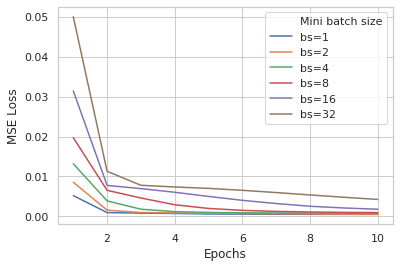

In [3]:
sns.set(style="whitegrid")
sns.lineplot(x="Epochs", y="MSE Loss", hue="Mini batch size", data=loss_df)

In [4]:
batches = [1, 2, 4, 8, 16, 32]
batch_labels = ["bs=1", "bs=2", "bs=4", "bs=8", "bs=16", "bs=32"]
losses = [0.00044, 0.00049, 0.00071, 0.00090, 0.00174, 0.00420]
dice_1 = [0.61405, 0.57333, 0.55674, 0.54217, 0.52956, 0.46033]
dice_2 = [0.38547, 0.36264, 0.33800, 0.34191, 0.34468, 0.32505]

data = []
for i in range(6):
    data += [["bs={}".format(batches[i]), losses[i], dice_2[i]]]

loss_df = pd.DataFrame(data, columns=["group", "MSE Loss", "DICE score"])
loss_df.head(6)

,group,MSE Loss,DICE score
0,bs=1,0.00044,0.38547
1,bs=2,0.00049,0.36264
2,bs=4,0.00071,0.33800
3,bs=8,0.00090,0.34191
4,bs=16,0.00174,0.34468
5,bs=32,0.00420,0.32505


(0, 0.0052)

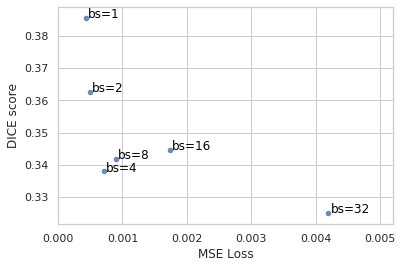

In [5]:
sns.set(style="whitegrid")
p1 = sns.regplot(data=loss_df, x="MSE Loss", y="DICE score", fit_reg=False, scatter_kws={'s':20})
for i in range(6):
     p1.text(losses[i] + 0.00003, dice_2[i], batch_labels[i], horizontalalignment='left', size='medium', color='black')
plt.xlim(0, losses[-1] + 0.001)

In [7]:
bs1_sigmoid = [0.00516, 0.00090, 0.00076, 0.00067, 0.00055, 0.00051, 0.00048, 0.00046, 0.00045, 0.00044]
bs1_tanh = [0.00229, 0.00064, 0.00051, 0.00046, 0.00044, 0.00042, 0.00035, 0.00032, 0.00034, 0.00030]
bs1_relu = [0.00277, 0.00090, 0.00084, 0.00078, 0.00073, 0.00077, 0.00072, 0.00070, 0.00070, 0.00069]
bs1_prelu = [0.00210, 0.00062, 0.00047, 0.00043, 0.00041, 0.00041, 0.00036, 0.00035, 0.00032, 0.00028]

data = []
for i in range(10):
    data += [[i+1, bs1_sigmoid[i], "sigmoid"]]
    data += [[i+1, bs1_tanh[i], "tanh"]]
    data += [[i+1, bs1_relu[i], "ReLU"]]
    data += [[i+1, bs1_prelu[i], "PReLU"]]
df = pd.DataFrame(data, columns=["Epochs", "MSE Loss", "Nonlinearity"])
df.head()

,Epochs,MSE Loss,Nonlinearity
0,1,0.00516,sigmoid
1,1,0.00229,tanh
2,1,0.00277,ReLU
3,1,0.00210,PReLU
4,2,0.00090,sigmoid


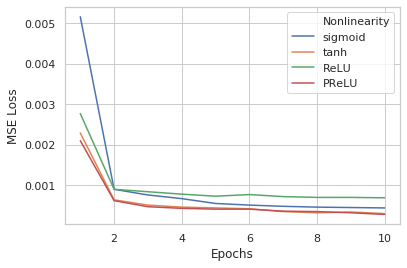

In [8]:
sns.set(style="whitegrid")
sns.lineplot(data=df, x="Epochs", y="MSE Loss", hue="Nonlinearity")